In [42]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import sklearn

# 0. Описание задачи
## Маркетинговая компания
Датасет содержит информацию связаную с кампаниями прямого маркетинга(телефонными звонками) португальского банковского учреждения.
Задачей классификации для данного датасета является орпеделение будет ли клиентом открыт срочный депозит.


# 1. Загрузка данных

In [43]:
dataset = "BankCustomerData.csv"
data_raw = pd.read_csv(dataset)

In [44]:
data_raw

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42634,21,student,single,secondary,no,2488,no,no,telephone,12,jan,661,2,92,1,success,yes
42635,87,retired,married,primary,no,2190,no,no,telephone,12,jan,512,2,-1,0,unknown,yes
42636,34,blue-collar,married,primary,no,6718,no,no,cellular,13,jan,278,4,97,1,other,no
42637,22,student,single,secondary,no,254,no,no,cellular,13,jan,143,2,-1,0,unknown,yes


Категориальный признак `term_deposit` приведем к бинарному виду, заменив "no" на `0`, а "yes" yа `1`.

In [45]:
data_raw["term_deposit"] = np.where(data_raw["term_deposit"] == "no", 0, 1)

Мы видим, что столбцы (признаки) имеют имена

* `age` - возраст
* `job` - область деятельности
* `marital` - семейное положение
* `education` - образование
* `default` - наличие неуплаты долга
* `balance` - баланс счета клиента
* `housing` - наличие ипотеки
* `loan` - наличие потребительского кредита
* `contact` - способ связи с клиентом(мобильный/домашний телефон)
* `day` - день последнего звонка
* `month` - месяц последнего звонка
* `duration` - продолжительность звонка
* `campaign` - количество звонков
* `pdays` - количество дней прошедших с последнего звонка
* `previous` - кол-во звонков до начала кампании
* `poutcome` - результат предыдущей маркетинговой компании
* `term_deposit` - откроет ли клиент быстрый депозит(целевой признак)

Признаки `age`, `balance`, `day`, `duration`, `campaign`, `pdays`, `previous` - количественные признаки.\
Признаки `job`, `marital`, `education`, `contact`, `month`, `poutcome` - номинальные(категориальные) признаки.\
Признаки `default`, `housing`, `loan`, `term_deposit` - бинарные признаки.

# 2. Вычисление основных характеристик

Выведем основные метрические характеристики

* `count` - число значений
* `mean` - среднее арифметическое
* `std` - разброс
* `min` - минимальное значение
* `max` - максимальное значение

In [46]:
data_raw.describe()

,age,balance,day,duration,campaign,pdays,previous,term_deposit
count,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000
mean,40.788808,1331.863951,15.854781,255.957504,2.816412,34.169141,0.465442,0.092896
std,10.200236,3011.537676,8.293901,258.361368,3.163564,92.041713,2.166705,0.290290
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,62.000000,8.000000,101.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,429.000000,16.000000,177.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1381.500000,21.000000,315.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,536.000000,275.000000,1.000000


Вычеслим и выведем матрицу корреляции, чтобы определить возможные связи между признаками

In [47]:
corr_mat = data_raw.corr()
corr_mat

,age,balance,day,duration,campaign,pdays,previous,term_deposit
age,1.000000,0.088716,-0.009869,-0.016529,0.008296,-0.044165,-0.016279,0.009129
balance,0.088716,1.000000,0.004696,0.016721,-0.013358,-0.006797,0.005194,0.046826
day,-0.009869,0.004696,1.000000,-0.032557,0.165906,-0.101391,-0.048445,-0.024916
duration,-0.016529,0.016721,-0.032557,1.000000,-0.085640,-0.010812,-0.007730,0.417468
campaign,0.008296,-0.013358,0.165906,-0.085640,1.000000,-0.079981,-0.024374,-0.058095
pdays,-0.044165,-0.006797,-0.101391,-0.010812,-0.079981,1.000000,0.450869,0.033657
previous,-0.016279,0.005194,-0.048445,-0.007730,-0.024374,0.450869,1.000000,0.033238
term_deposit,0.009129,0.046826,-0.024916,0.417468,-0.058095,0.033657,0.033238,1.000000


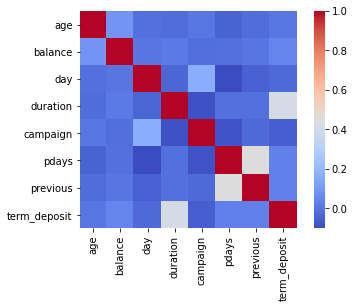

In [48]:
sns.heatmap(corr_mat, square=True, cmap="coolwarm")
pass

Из полученных данных видим, что признаки не коррелируют между собой.

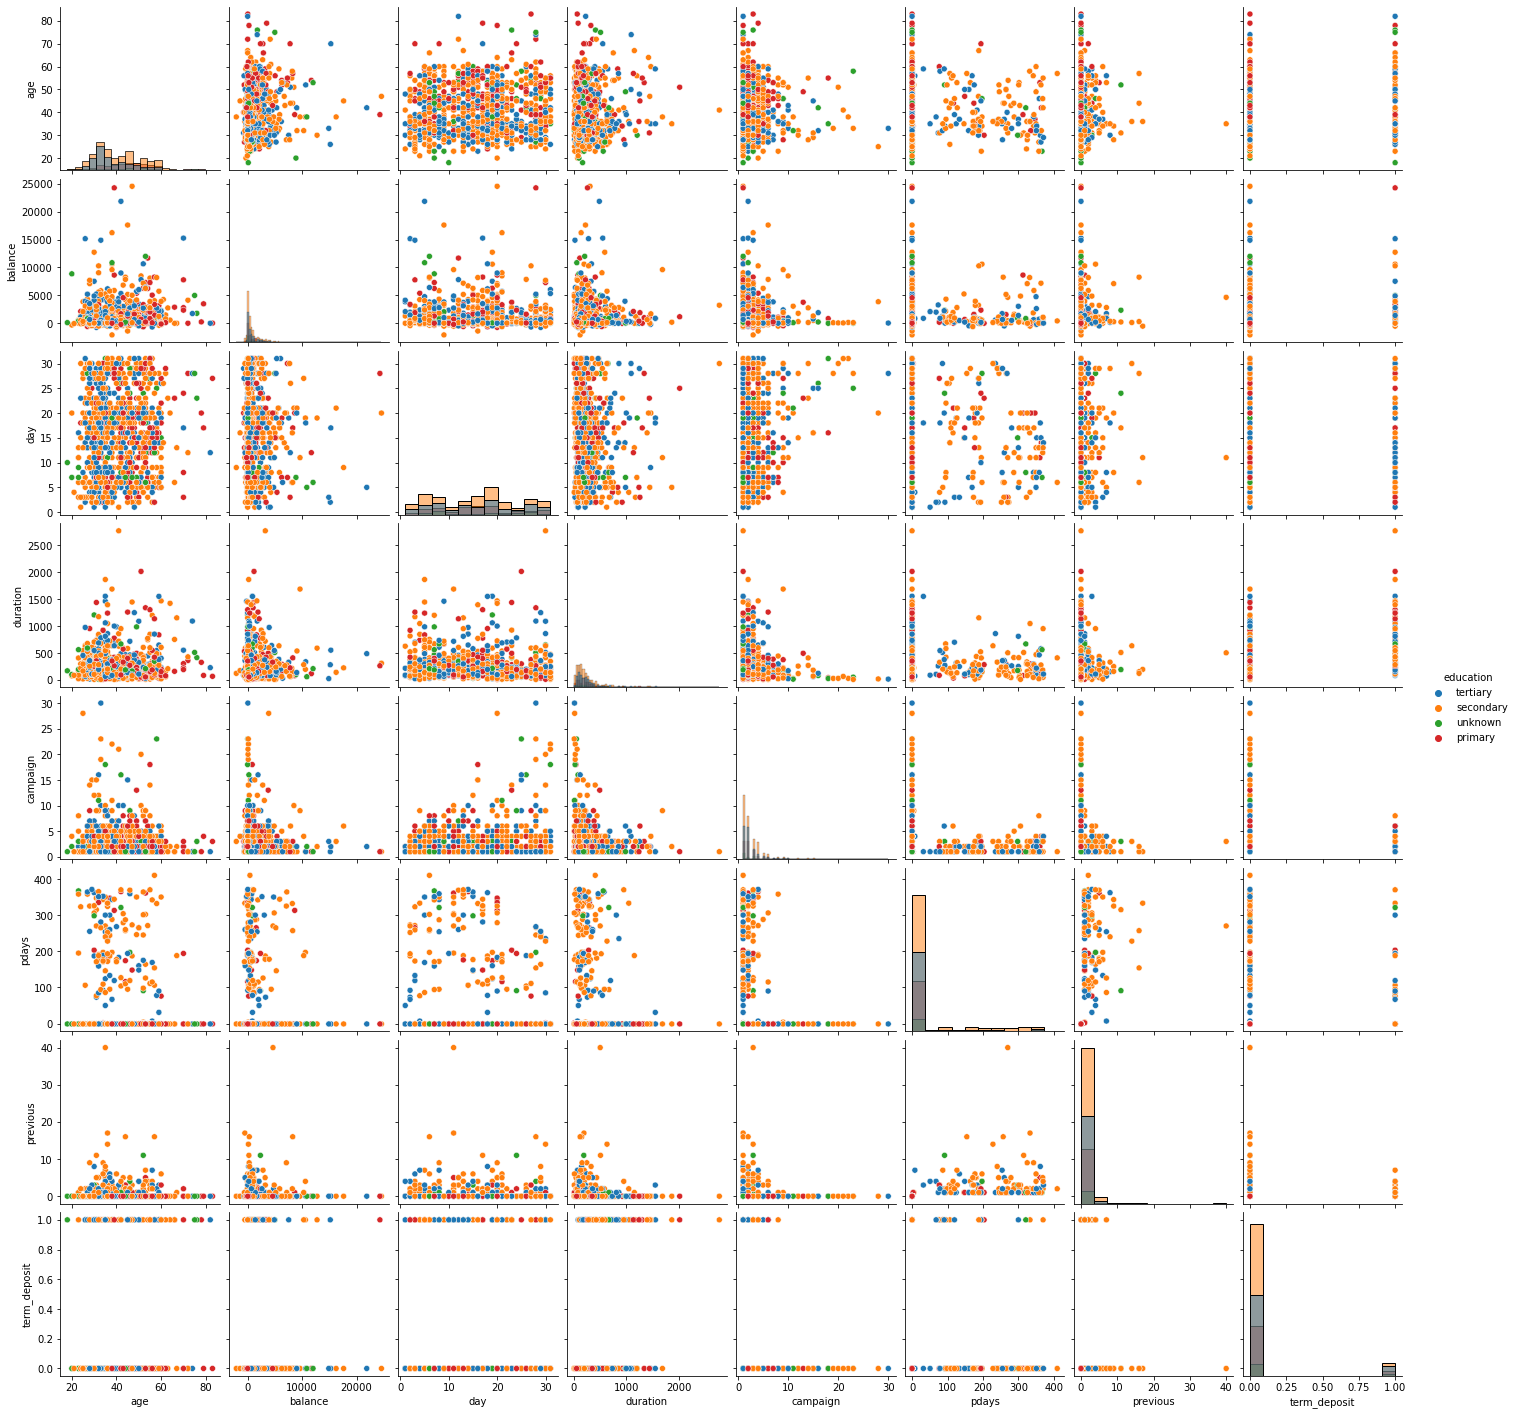

In [49]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data_raw.shape[0]), size=1000, replace=False)
sns.pairplot(data_raw.iloc[random_subset], hue="education", diag_kind="hist")
pass

# 3. Обработка пропущенных значений

In [50]:
data_raw.isna().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
term_deposit    0
dtype: int64

Пропущенных значений нет.

# 4. Обработка категориальных признаков

Обработаем категориальные признаки заменив тип с `object` на `category`. А затем каждую категорию заменим на бинарные признаки.

In [51]:
data_raw["job"] = data_raw["job"].astype("category")
data_raw["job"].dtype

CategoricalDtype(categories=['admin.', 'blue-collar', 'entrepreneur', 'housemaid',
                  'management', 'retired', 'self-employed', 'services',
                  'student', 'technician', 'unemployed', 'unknown'],
, ordered=False)

In [52]:
data_raw["marital"] = data_raw["marital"].astype("category")
data_raw["marital"].dtype

CategoricalDtype(categories=['divorced', 'married', 'single'], ordered=False)

In [53]:
data_raw["education"] = data_raw["education"].astype("category")
data_raw["education"].dtype

CategoricalDtype(categories=['primary', 'secondary', 'tertiary', 'unknown'], ordered=False)

In [54]:
data_raw["contact"] = data_raw["contact"].astype("category")
data_raw["contact"].dtype

CategoricalDtype(categories=['cellular', 'telephone', 'unknown'], ordered=False)

In [55]:
data_raw["month"] = data_raw["month"].astype("category")
data_raw["month"].dtype

CategoricalDtype(categories=['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar',
                  'may', 'nov', 'oct', 'sep'],
, ordered=False)

In [56]:
data_raw["poutcome"] = data_raw["poutcome"].astype("category")
data_raw["poutcome"].dtype

CategoricalDtype(categories=['failure', 'other', 'success', 'unknown'], ordered=False)

In [57]:
data_raw.describe(include=["category"])

,job,marital,education,contact,month,poutcome
count,42639,42639,42639,42639,42639,42639
unique,12,3,4,3,12,4
top,blue-collar,married,secondary,cellular,may,unknown
freq,9536,25868,22066,27218,13532,36085


In [58]:
data = pd.get_dummies(data_raw)

# 5. Нормализация

Произведем нормализация для всех числовых признаков.

In [59]:
data = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))
data.describe()

,age,balance,day,duration,campaign,pdays,previous,term_deposit,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
count,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,...,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000
mean,0.295959,0.084895,0.495159,0.052045,0.029297,0.065492,0.001693,0.092896,0.112808,0.223645,...,0.120265,0.006051,0.317362,0.091348,0.012149,0.006614,0.100167,0.035578,0.017965,0.846291
std,0.132471,0.027341,0.276463,0.052534,0.051025,0.171400,0.007879,0.290290,0.316361,0.416692,...,0.325276,0.077552,0.465455,0.288107,0.109550,0.081056,0.300225,0.185237,0.132825,0.360674
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.194805,0.073366,0.233333,0.020537,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.272727,0.076698,0.500000,0.035990,0.016129,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.389610,0.085346,0.666667,0.064050,0.032258,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 6. Классификация

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [61]:
X = data.drop(["term_deposit"], 1)
y = data["term_deposit"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1122)

In [62]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)
"Train: {}, Test: {}".format(accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred))

'Train: 0.924899022801303, Test: 0.8956378986866792'

In [63]:
knn_model = KNeighborsClassifier(n_neighbors=8)
knn_model.fit(X_train, y_train)
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)
"Train: {}, Test: {}".format(accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred))

'Train: 0.9167166123778502, Test: 0.9012664165103189'

In [64]:
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train, y_train)
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)
"Train: {}, Test: {}".format(accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred))

'Train: 0.9152312703583062, Test: 0.900797373358349'

# 7. Вывод

* При увеличение числа соседей в алгоритме ближайших соседей растет и точность, следовательно можно подобрать такое значение при котором достигнится максимальная точность.
* Алгоритм показывает достаточно высокие точности, что по моему предположению связанно с несбалансированностью классов.